In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, chi2

## Importing Dataset

In [9]:
df = pd.read_excel('/content/train.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


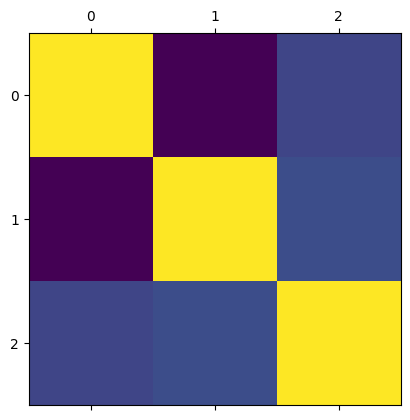

In [13]:
plt.matshow(df.corr())

## Splitting dataset into X(features) and y(labels)

In [14]:
X=df.iloc[:,1:-1]
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [15]:
y=df["Churn"]
y=pd.DataFrame(y)
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [16]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
# X=LabelEncoder().fit_transform(X)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
X['gender']=LabelEncoder().fit_transform(X['gender'])
X['Partner']=LabelEncoder().fit_transform(X['Partner'])
X['Dependents']=LabelEncoder().fit_transform(X['Dependents'])
X['PhoneService']=LabelEncoder().fit_transform(X['PhoneService'])
X['MultipleLines']=LabelEncoder().fit_transform(X['MultipleLines'])
X['InternetService']=LabelEncoder().fit_transform(X['InternetService'])
X['OnlineSecurity']=LabelEncoder().fit_transform(X['OnlineSecurity'])
X['OnlineBackup']=LabelEncoder().fit_transform(X['OnlineBackup'])
X['DeviceProtection']=LabelEncoder().fit_transform(X['DeviceProtection'])
X['StreamingTV']=LabelEncoder().fit_transform(X['StreamingTV'])
X['StreamingMovies']=LabelEncoder().fit_transform(X['StreamingMovies'])
X['Contract']=LabelEncoder().fit_transform(X['Contract'])
X['PaperlessBilling']=LabelEncoder().fit_transform(X['PaperlessBilling'])
X['PaymentMethod']=LabelEncoder().fit_transform(X['PaymentMethod'])
X['TechSupport']=LabelEncoder().fit_transform(X['TechSupport'])
X['TechSupport']=LabelEncoder().fit_transform(X['TechSupport'])

In [18]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [19]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6


In [20]:
X['MonthlyCharges'] = X['MonthlyCharges'].astype('int')

In [21]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'],errors='coerce')
median = X['TotalCharges'].median()
X['TotalCharges'].fillna(median,inplace=True)

## Feature Selection

### Lasso

In [51]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.000295
Best score using built-in LassoCV: 0.275586
Lasso picked 16 variables and eliminated the other 3 variables


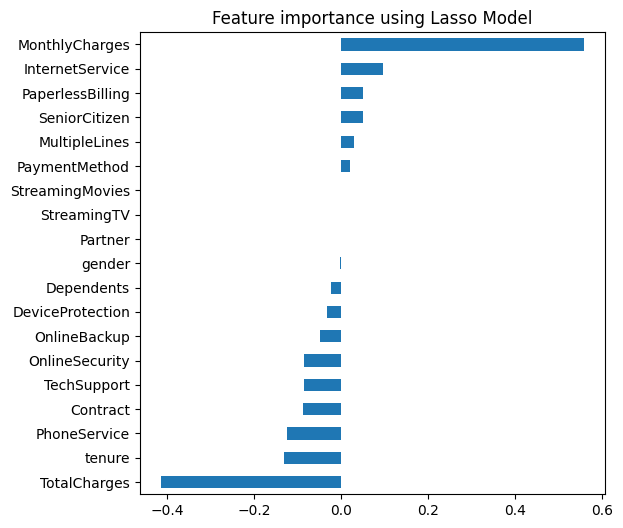

In [52]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,6)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

## Normalisation of data

In [24]:
from sklearn.preprocessing import MinMaxScaler
names=X.columns
indexes=X.index
X=MinMaxScaler().fit_transform(X)
X=pd.DataFrame(X,columns=names,index=indexes)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.11,0.001275
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.38,0.215867
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.35,0.010310
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.24,0.210241
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.52,0.015330


### Select KBest using Chi2

In [25]:
kmodel=SelectKBest(score_func=chi2,k=8)
x_clf_new=kmodel.fit_transform(X,y)
mask=kmodel.get_support()
important=X.columns[mask]
print(important,len(important))

Index(['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object') 8


## Split data into train, test and validation set

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_rem,y_train,y_rem = train_test_split(X, y, test_size=0.20, random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_rem, y_rem, test_size=0.50, random_state=42)

## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression()
log.fit(X_train,y_train)
acc = accuracy_score(log.predict(X_val),y_val)
f'Validation accuracy: {round(acc*100,2)}%'
log_pred=log.predict(X_test)

In [67]:
log_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [28]:
acc = accuracy_score(log.predict(X_test),y_test)
f'Testing accuracy: {round(acc*100,2)}%'

'Testing accuracy: 82.41%'

In [68]:
-from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_absolute_error(y_test,log_pred))
print(mean_squared_error(y_test,log_pred))
print(np.sqrt(mean_squared_error(y_test,log_pred)))

0.17588652482269504
0.17588652482269504
0.4193882745412597


In [71]:
from sklearn.metrics import r2_score
score=r2_score(y_test,log_pred)
print(score)

0.09441233140655114


## Using top 3 variables given by LassoCV

In [29]:
log.fit(X_train[["MonthlyCharges","TotalCharges","tenure"]],y_train)
acc = accuracy_score(log.predict(X_val[["MonthlyCharges","TotalCharges","tenure"]]),y_val)
f'Validation accuracy: {round(acc*100,2)}%'

'Validation accuracy: 79.12%'

In [30]:
acc = accuracy_score(log.predict(X_test[["MonthlyCharges","TotalCharges","tenure"]]),y_test)
f'Testing accuracy: {round(acc*100,2)}%'

'Testing accuracy: 80.57%'

## Using top 8 variables given by Select Kbest

In [31]:
log.fit(X_train[['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity','OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling']],y_train)
acc = accuracy_score(log.predict(X_val[['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity','OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling']]),y_val)
f'Validation accuracy: {round(acc*100,2)}%'

'Validation accuracy: 78.55%'

In [32]:
acc = accuracy_score(log.predict(X_test[['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity','OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling']]),y_test)
f'Testing accuracy: {round(acc*100,2)}%'

'Testing accuracy: 80.14%'

## Hyperparameter Tuning using GridSearchCV for decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4]}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [34]:
dtree_grid_search(X_train,y_train,2)

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 9,
 'min_samples_split': 2}

## Decision Tree Classifier

In [35]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
acc = accuracy_score(y_train,y_pred)
f'Training accuracy: {round(acc*100,2)}%'

'Training accuracy: 78.27%'

In [36]:
y_pred = dt.predict(X_val)
acc = accuracy_score(y_val,y_pred)
f'Validation accuracy: {round(acc*100,2)}%'

'Validation accuracy: 77.41%'

In [37]:
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
f'Testing accuracy: {round(acc*100,2)}%'

'Testing accuracy: 78.87%'

[Text(0.5, 0.875, 'x[14] <= 0.25\nentropy = 0.835\nsamples = 5634\nvalue = [4138, 1496]'),
 Text(0.25, 0.625, 'x[8] <= 0.25\nentropy = 0.984\nsamples = 3083\nvalue = [1768, 1315]'),
 Text(0.125, 0.375, 'x[4] <= 0.146\nentropy = 1.0\nsamples = 2096\nvalue = [1024, 1072]'),
 Text(0.0625, 0.125, 'entropy = 0.947\nsamples = 1012\nvalue = [370, 642]'),
 Text(0.1875, 0.125, 'entropy = 0.969\nsamples = 1084\nvalue = [654, 430]'),
 Text(0.375, 0.375, 'x[17] <= 0.715\nentropy = 0.805\nsamples = 987\nvalue = [744, 243]'),
 Text(0.3125, 0.125, 'entropy = 0.749\nsamples = 817\nvalue = [642, 175]'),
 Text(0.4375, 0.125, 'entropy = 0.971\nsamples = 170\nvalue = [102, 68]'),
 Text(0.75, 0.625, 'x[17] <= 0.745\nentropy = 0.369\nsamples = 2551\nvalue = [2370, 181]'),
 Text(0.625, 0.375, 'x[14] <= 0.75\nentropy = 0.243\nsamples = 1918\nvalue = [1841, 77]'),
 Text(0.5625, 0.125, 'entropy = 0.379\nsamples = 883\nvalue = [818, 65]'),
 Text(0.6875, 0.125, 'entropy = 0.091\nsamples = 1035\nvalue = [1023, 12]

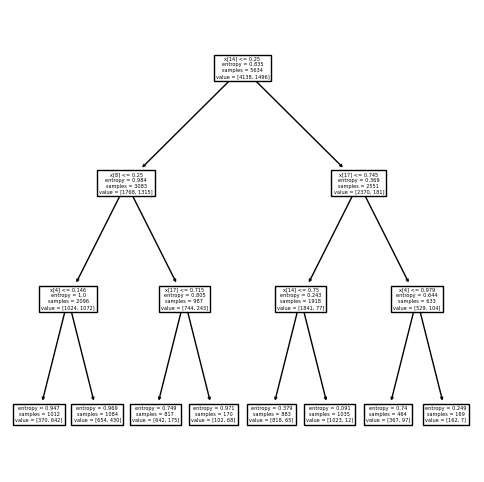

In [38]:
plot_tree(dt)

## Using features of GridSearchCV

In [39]:
dt = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 5,
 max_leaf_nodes= 7,
 min_samples_split= 2)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
acc = accuracy_score(y_train,y_pred)
f'Training accuracy: {round(acc*100,2)}%'

'Training accuracy: 78.36%'

In [40]:
y_pred = dt.predict(X_val)
acc = accuracy_score(y_val,y_pred)
f'Validation accuracy: {round(acc*100,2)}%'

'Validation accuracy: 78.55%'

In [41]:
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
f'Testing accuracy: {round(acc*100,2)}%'

'Testing accuracy: 79.57%'

## Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [43]:
rf.fit(X_train,y_train)
y_pred = dt.predict(X_train)
acc = accuracy_score(y_train,y_pred)
f'Training accuracy: {round(acc*100,2)}%'

'Training accuracy: 78.36%'

In [44]:
y_pred = rf.predict(X_val)
acc = accuracy_score(y_val,y_pred)
f'Validation accuracy: {round(acc*100,2)}%'

'Validation accuracy: 78.27%'

In [45]:
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
f'Testing accuracy: {round(acc*100,2)}%'

'Testing accuracy: 79.72%'

## Using features of GridSearchCV

In [46]:
rf1 = RandomForestClassifier()
param_grid = [
 {'n_estimators': [10, 50, 100], 'max_features': [2, 4, 6, 8,12,14,16,18,20]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]
grid_search = GridSearchCV(rf1, param_grid,scoring='accuracy',return_train_score=False)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8, 12, 14, 16, 18, 20],
                          'n_estimators': [10, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='accuracy')

In [47]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

In [48]:
rf2 = RandomForestClassifier(max_features= 4, n_estimators= 100, random_state=0)
rf2.fit(X_train,y_train)
y_pred = rf2.predict(X_train)
acc = accuracy_score(y_train,y_pred)
f'Training accuracy: {round(acc*100,2)}%'

'Training accuracy: 99.86%'

In [49]:
y_pred = rf2.predict(X_val)
acc = accuracy_score(y_val,y_pred)
f'Validation accuracy: {round(acc*100,2)}%'

'Validation accuracy: 78.27%'

In [50]:
y_pred = rf2.predict(X_test)
acc = accuracy_score(y_test,y_pred)
f'Testing accuracy: {round(acc*100,2)}%'

'Testing accuracy: 79.72%'

## The Telco Customer Churn is best predicted using Logistic Regression which has a testing accuracy of 80%

In [73]:
import pickle

In [77]:
pickle.dump(log,open('logmodel.pkl','wb'))

In [78]:
pickled_model=pickle.load(open('logmodel.pkl','rb'))